# Histogramas e KDE para diferentes grupos. Classifição em classes. Regressão, binarizar a variável de saida para formar os grupos. Eventualmente variáveis que nao sejam continuas

## Definição de pronto

### Dados preparados no ambiente

## Definição de entregue

### Notebook fazendo a avaliação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.precision", 4)

df_wine = pd.read_parquet("../../Data/Processed/wine/df_wine.parquet") 

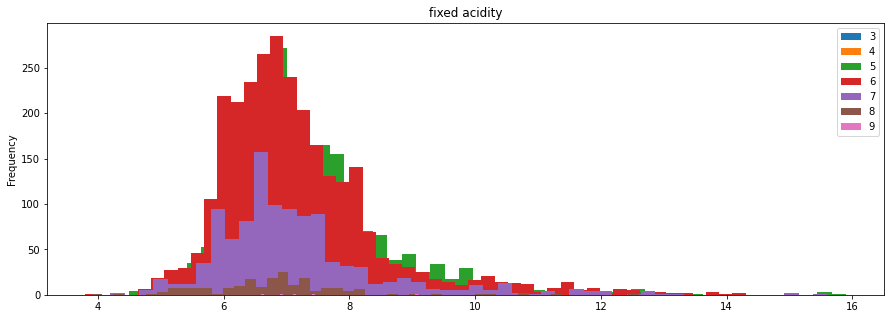

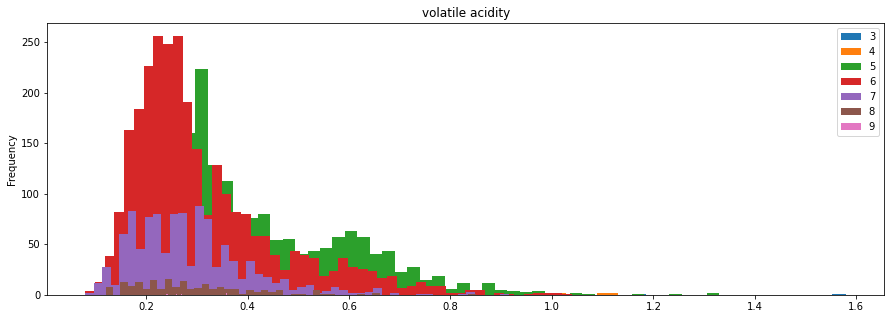

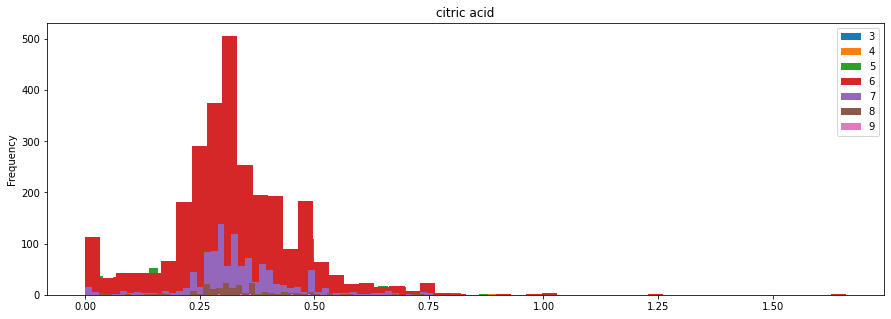

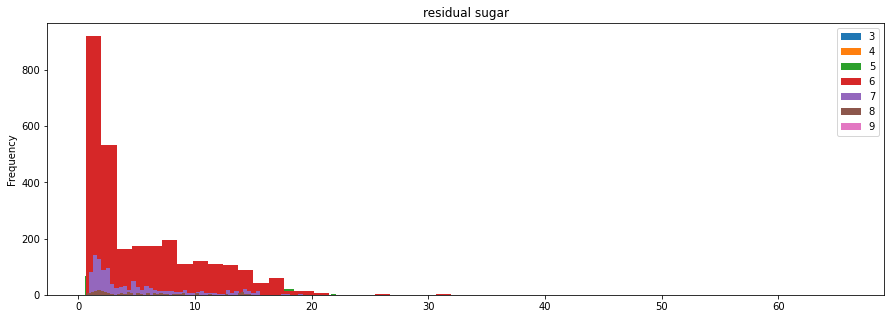

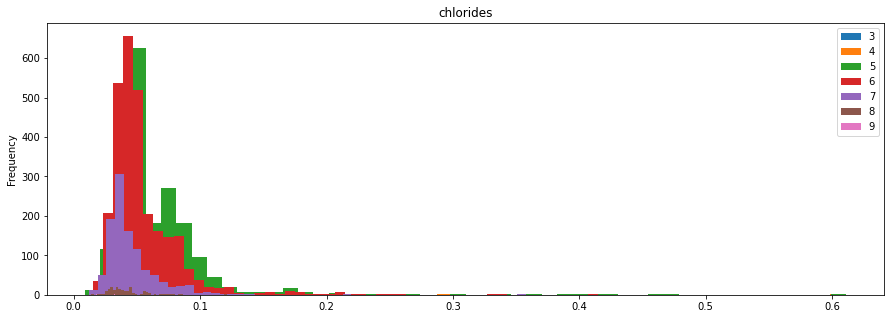

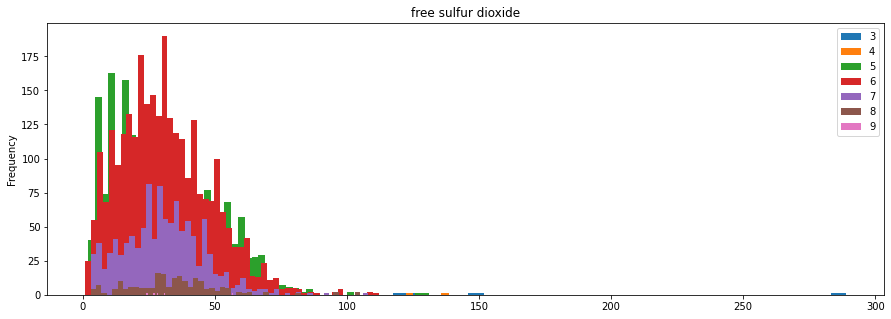

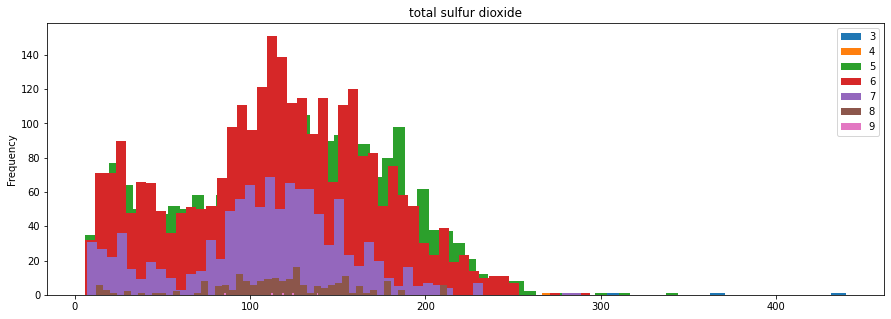

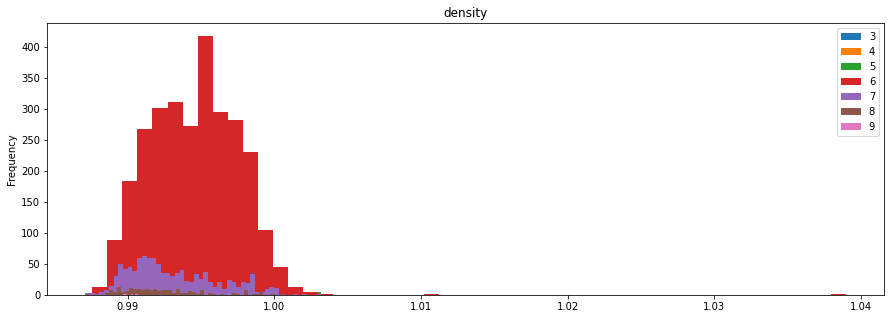

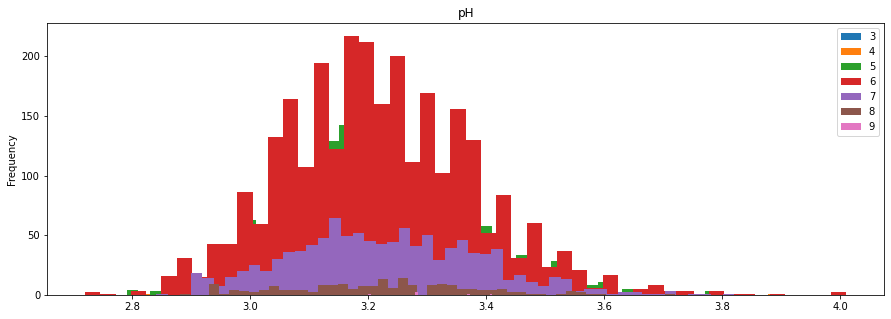

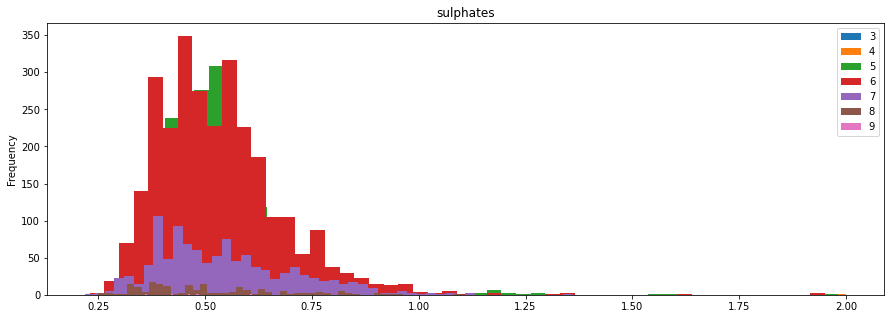

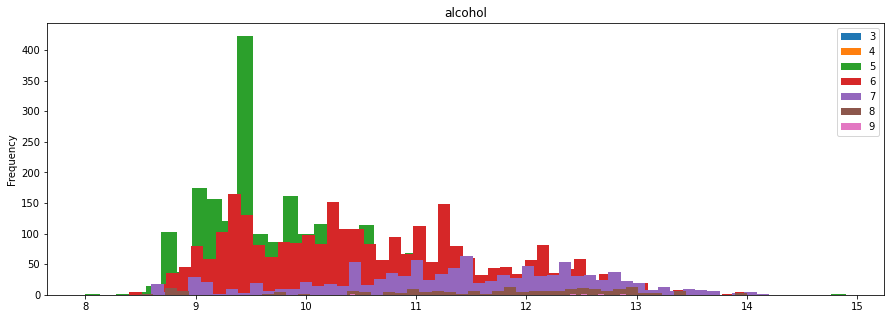

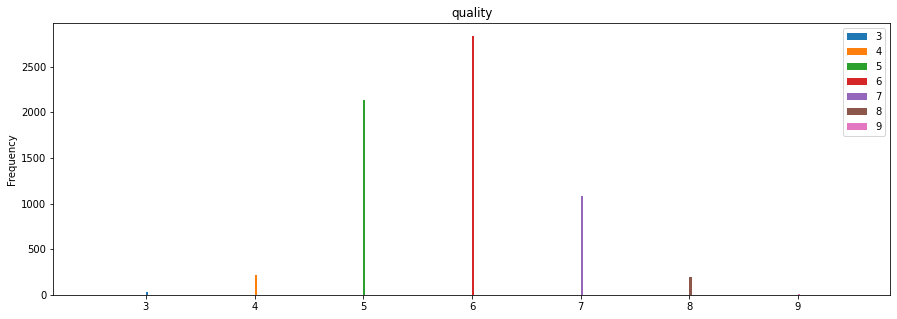

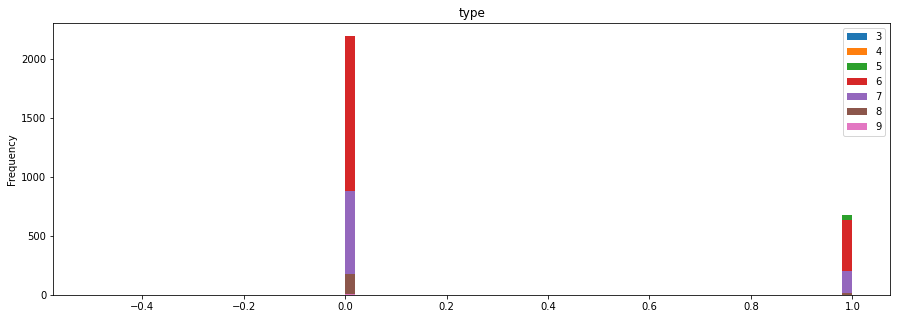

In [2]:
# Histogramas para grupo Qualidade

# Referência: https://matplotlib.org/gallery/index.html'''

for (column, _ ) in df_wine.items():
    plt.figure()
    df_wine.groupby('quality')[column].plot.hist(bins = 50,figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

**Essa análise parece fazer sentido já que a variável a ser agrupada tem poucos valores discretos. Além de ser a variável de interesse.**

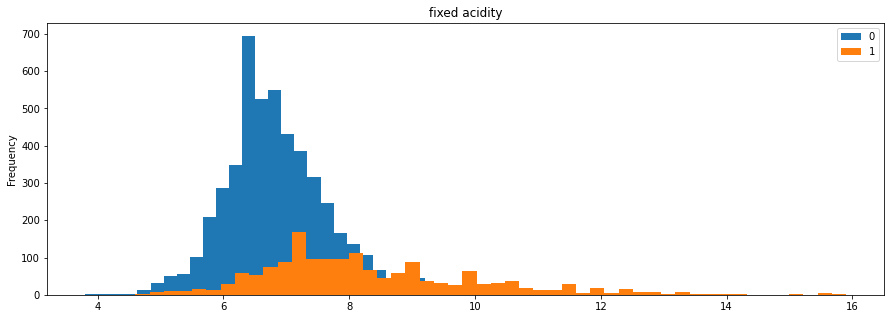

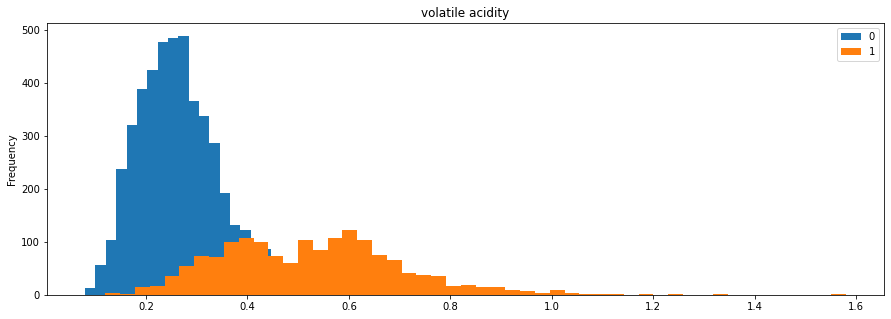

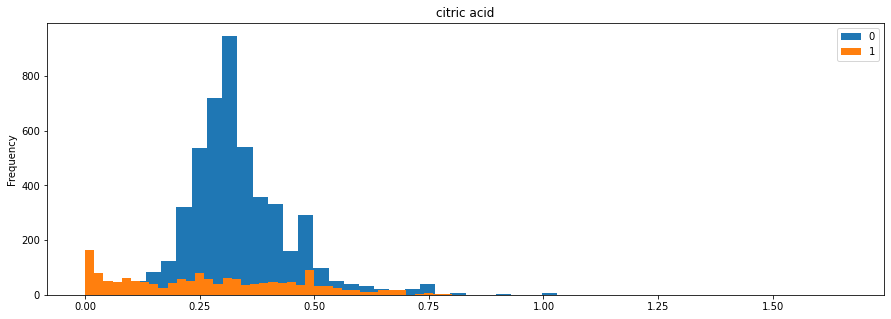

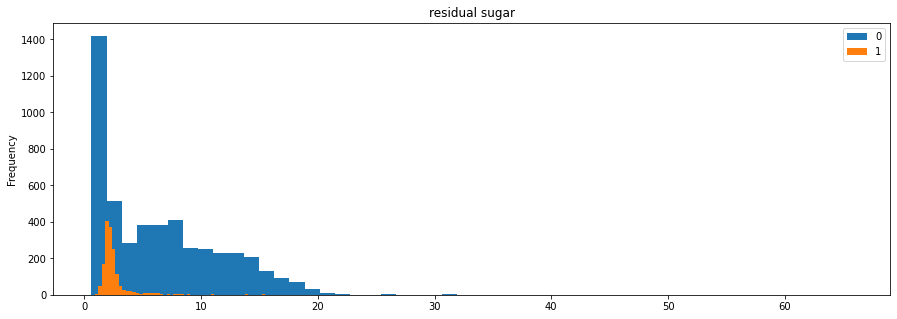

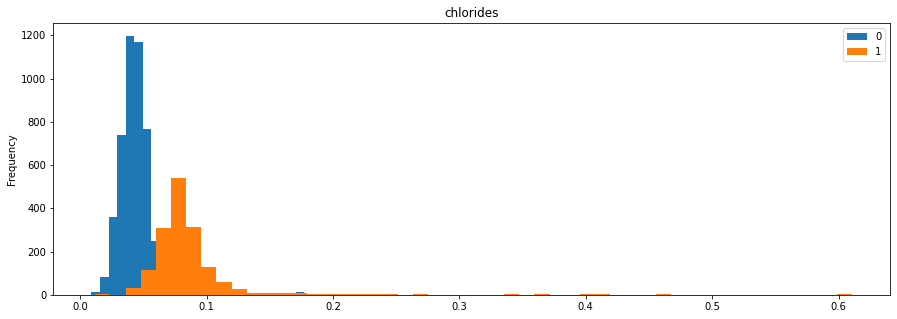

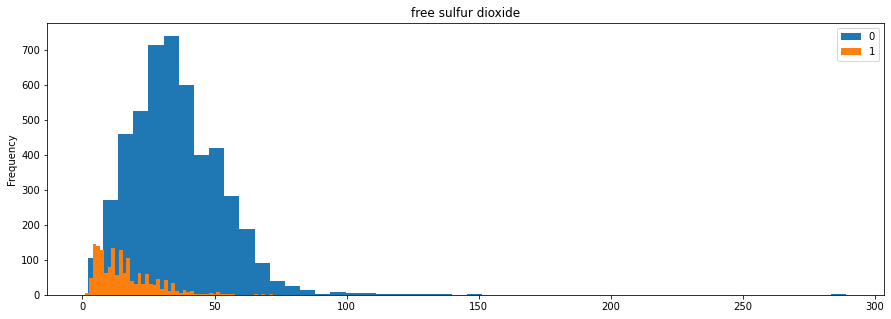

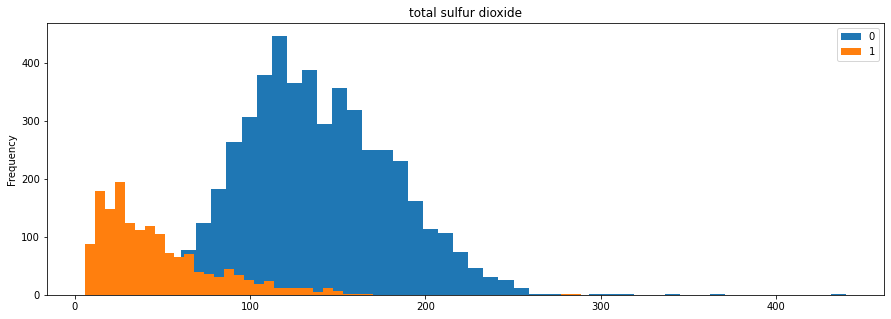

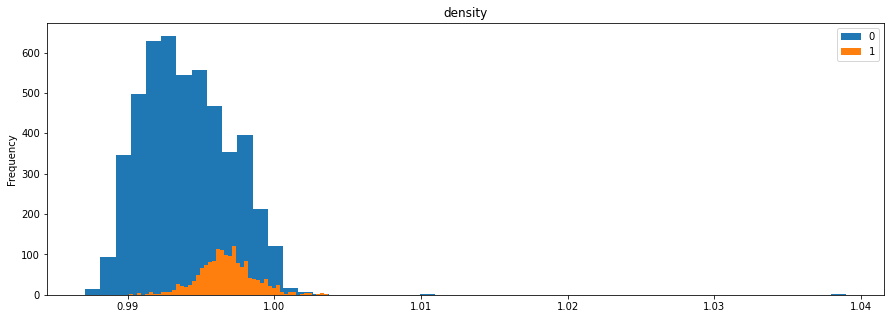

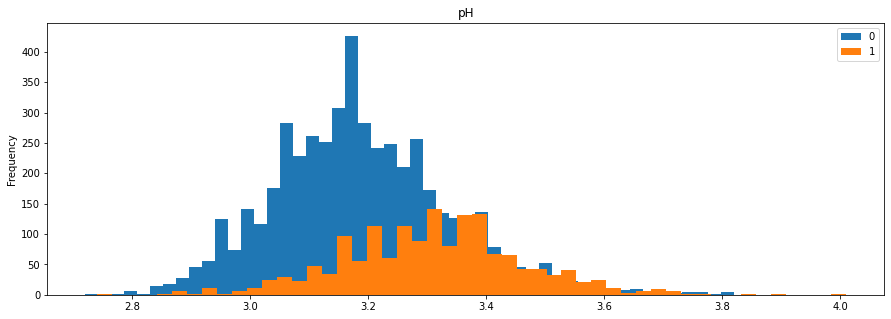

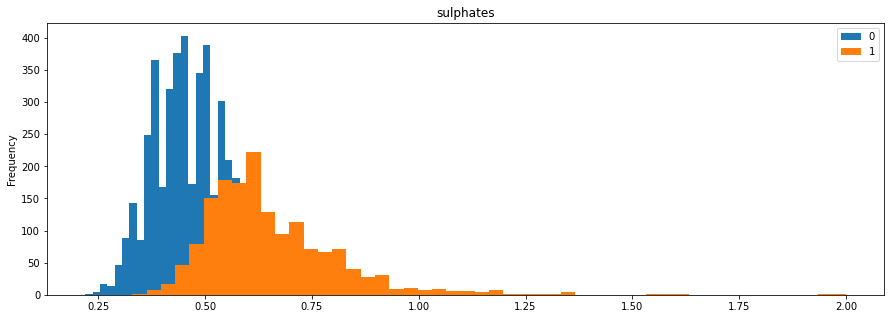

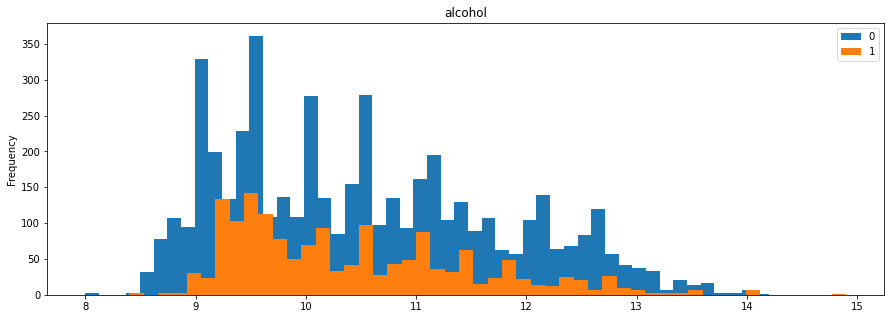

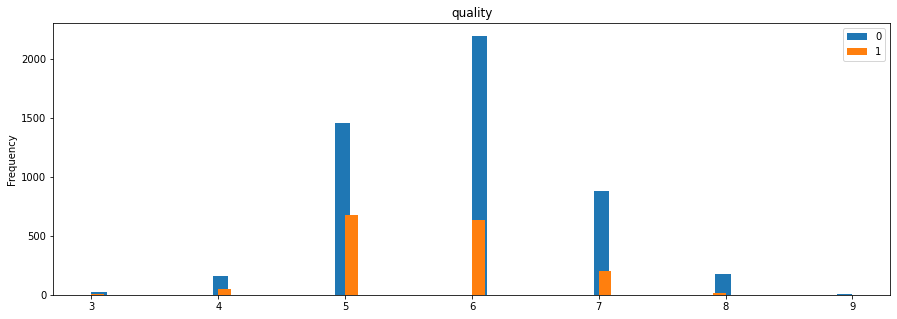

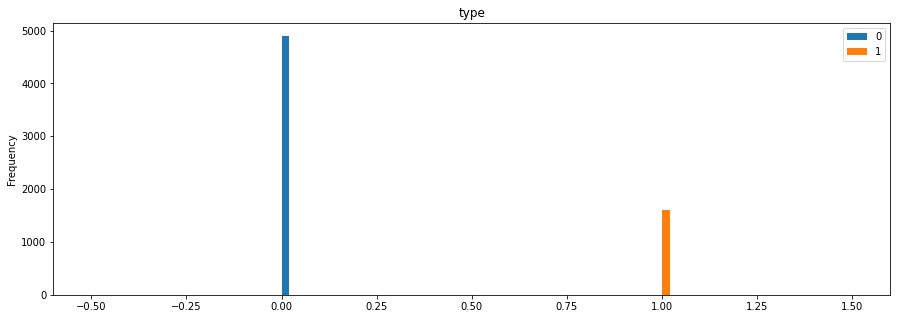

In [3]:
# Histogramas para tipo de vinho -> 0 = Branco, 1 = Tinto 

# Referência: https://matplotlib.org/gallery/index.html

for (column, _ ) in df_wine.items():
    plt.figure()
    df_wine.groupby('type')[column].plot.hist(bins = 50,figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

**Essa análise também parece fazer sentido já que a variável a ser agrupada tem poucos valores discretos. Mas como o objetivo do trabalho é aumentar o lucro de vendas pelo entendimento da qualidade dos vinhos por suas características e notas, esta não é uma boa variável de interesse**

**Vamos criar uma nova classe binária de qualidade (low_high) sendo que vinhos que tenham notas abaixo de 6 sejam classificados com 'low' e acima disso como 'high'.**

In [4]:
df_wine['low_high'] = df_wine.apply(lambda row: 'low' if row.quality < 6 else 'high', axis=1)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,low_high
index,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,low


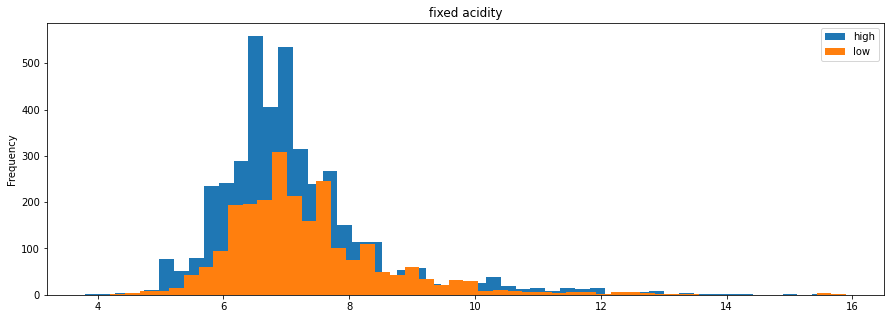

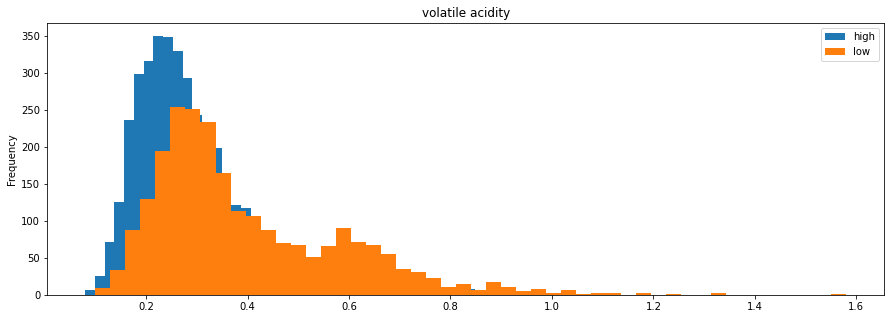

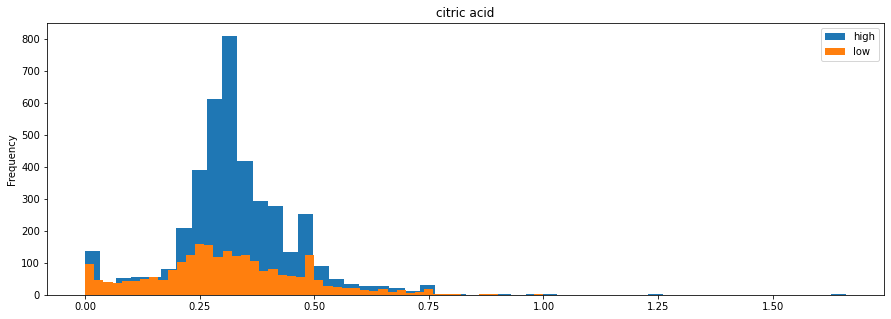

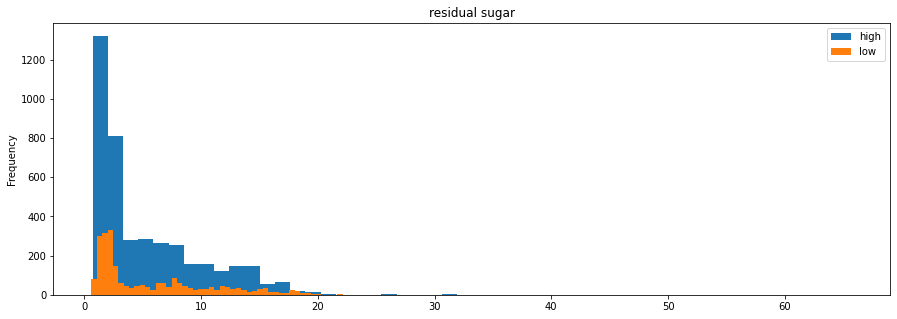

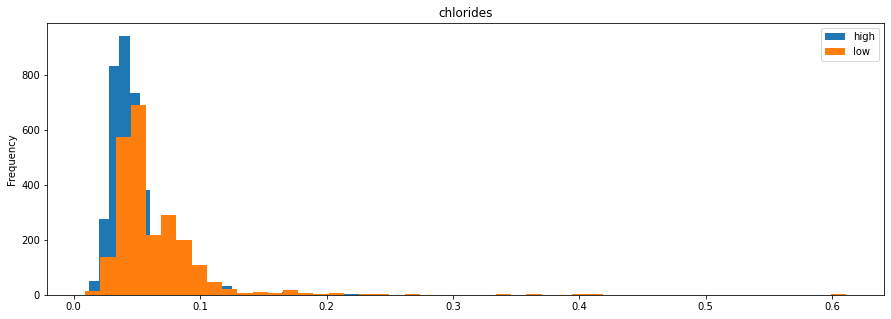

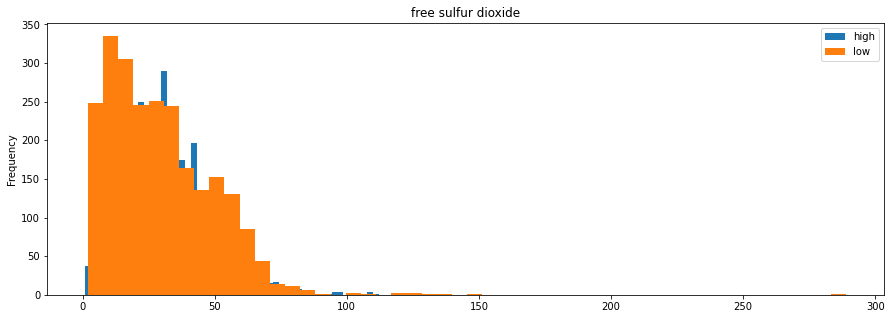

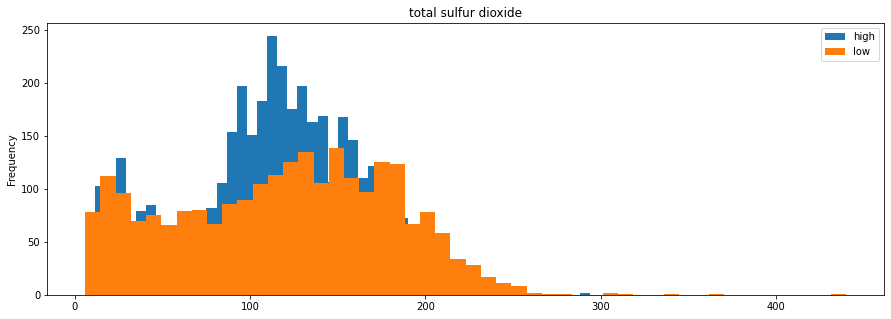

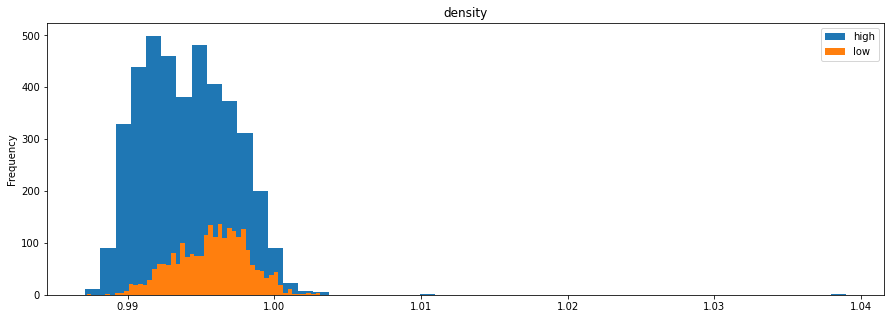

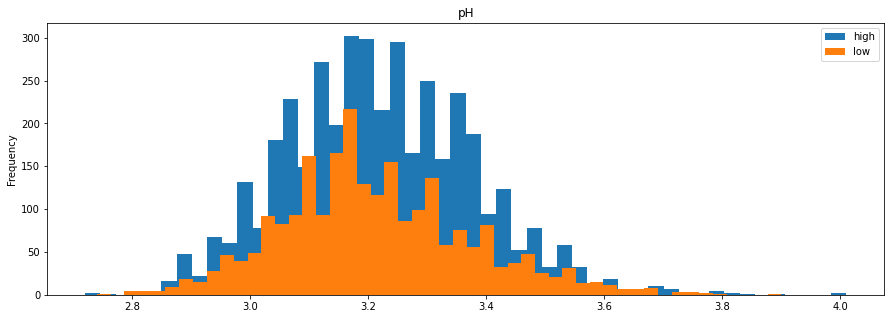

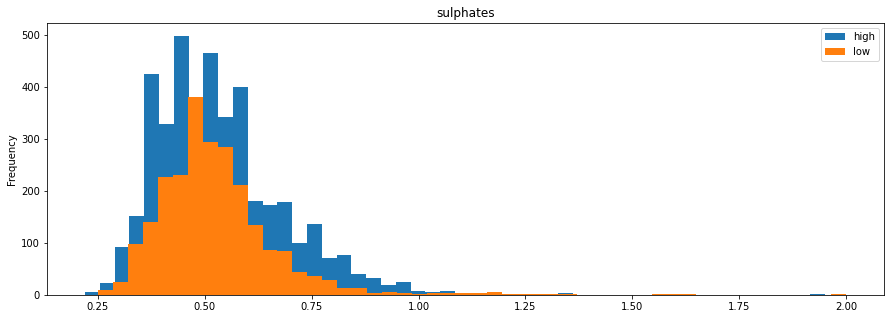

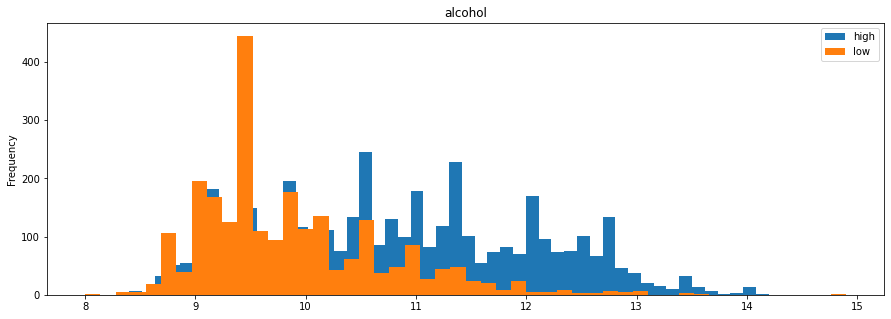

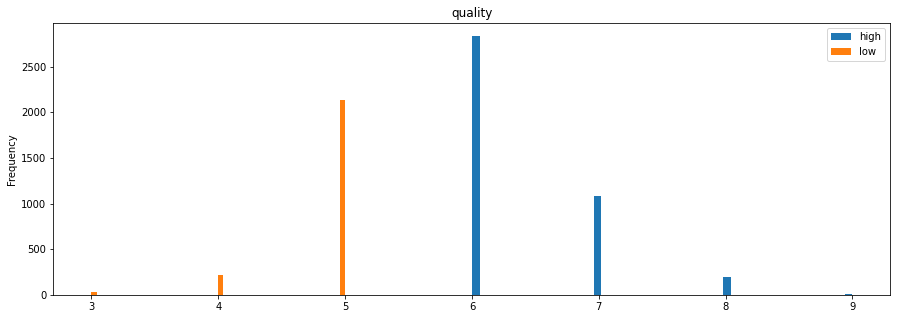

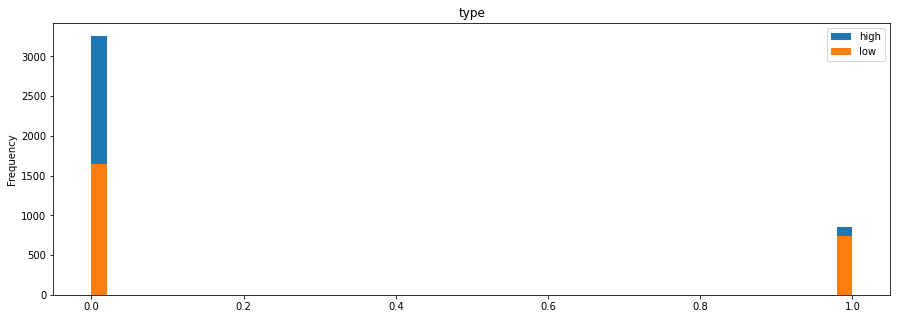

In [25]:
# Histogramas para grupo low_high

# Referência: https://matplotlib.org/gallery/index.html

for (column, _ ) in df_wine.drop(['low_high'], axis = 1).items():
    plt.figure()
    df_wine.groupby('low_high')[column].plot.hist(bins=50, figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

**Essa análise parece fazer sentido já que a variável a ser agrupada tem poucos valores discretos. Além de ser a variável de interesse. Neste caso binarizamos a qualidade o que pode falicitar bastante a análise**

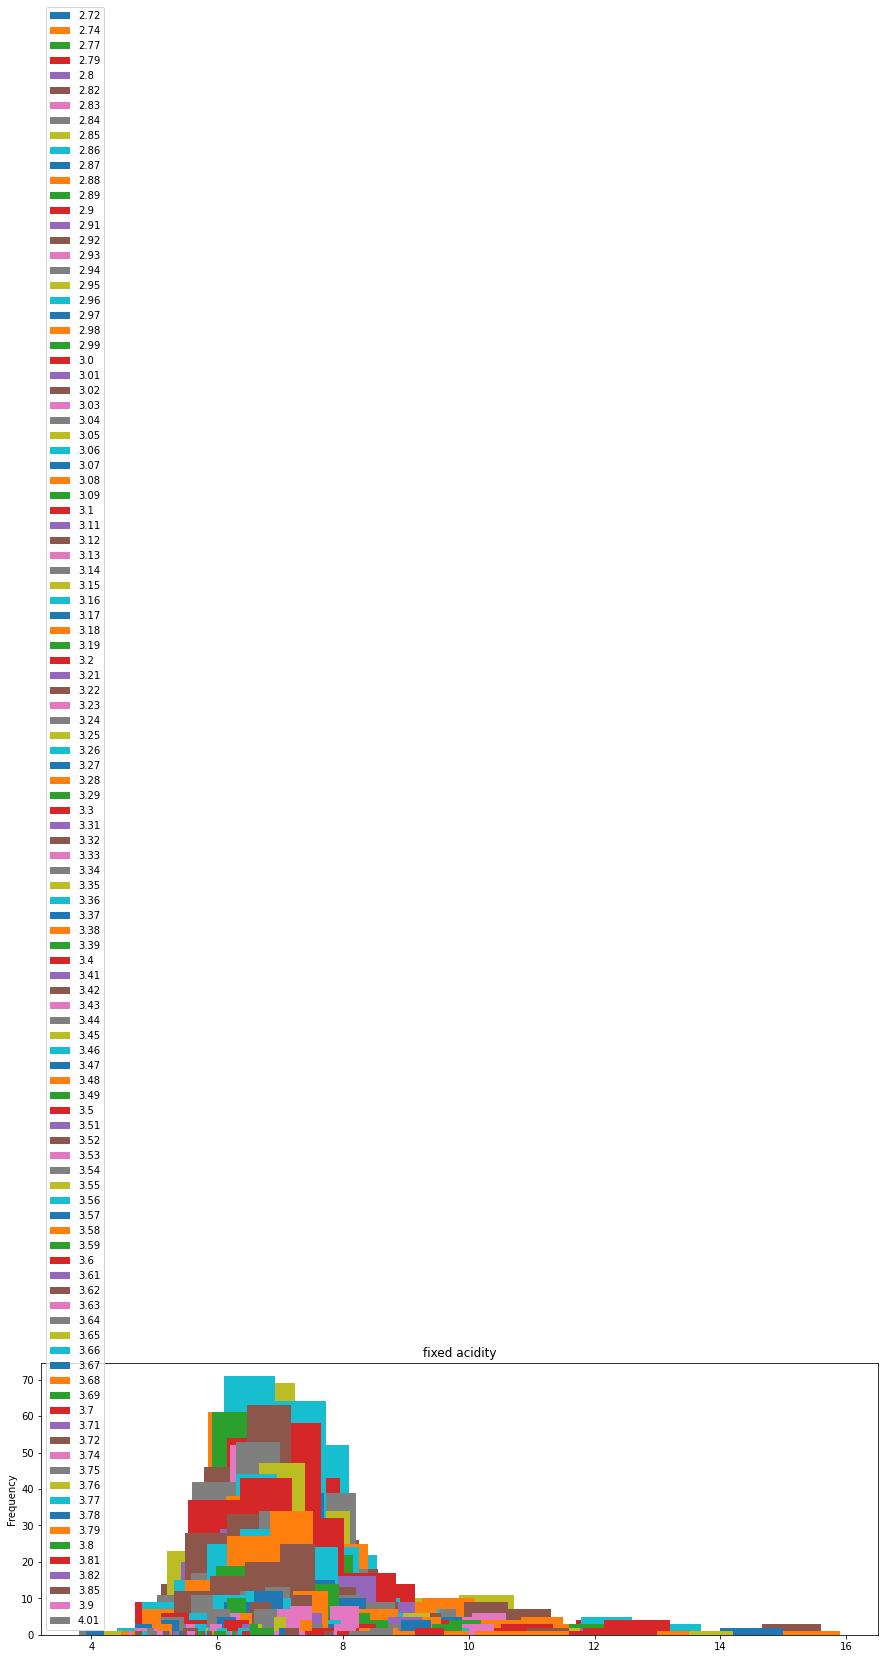

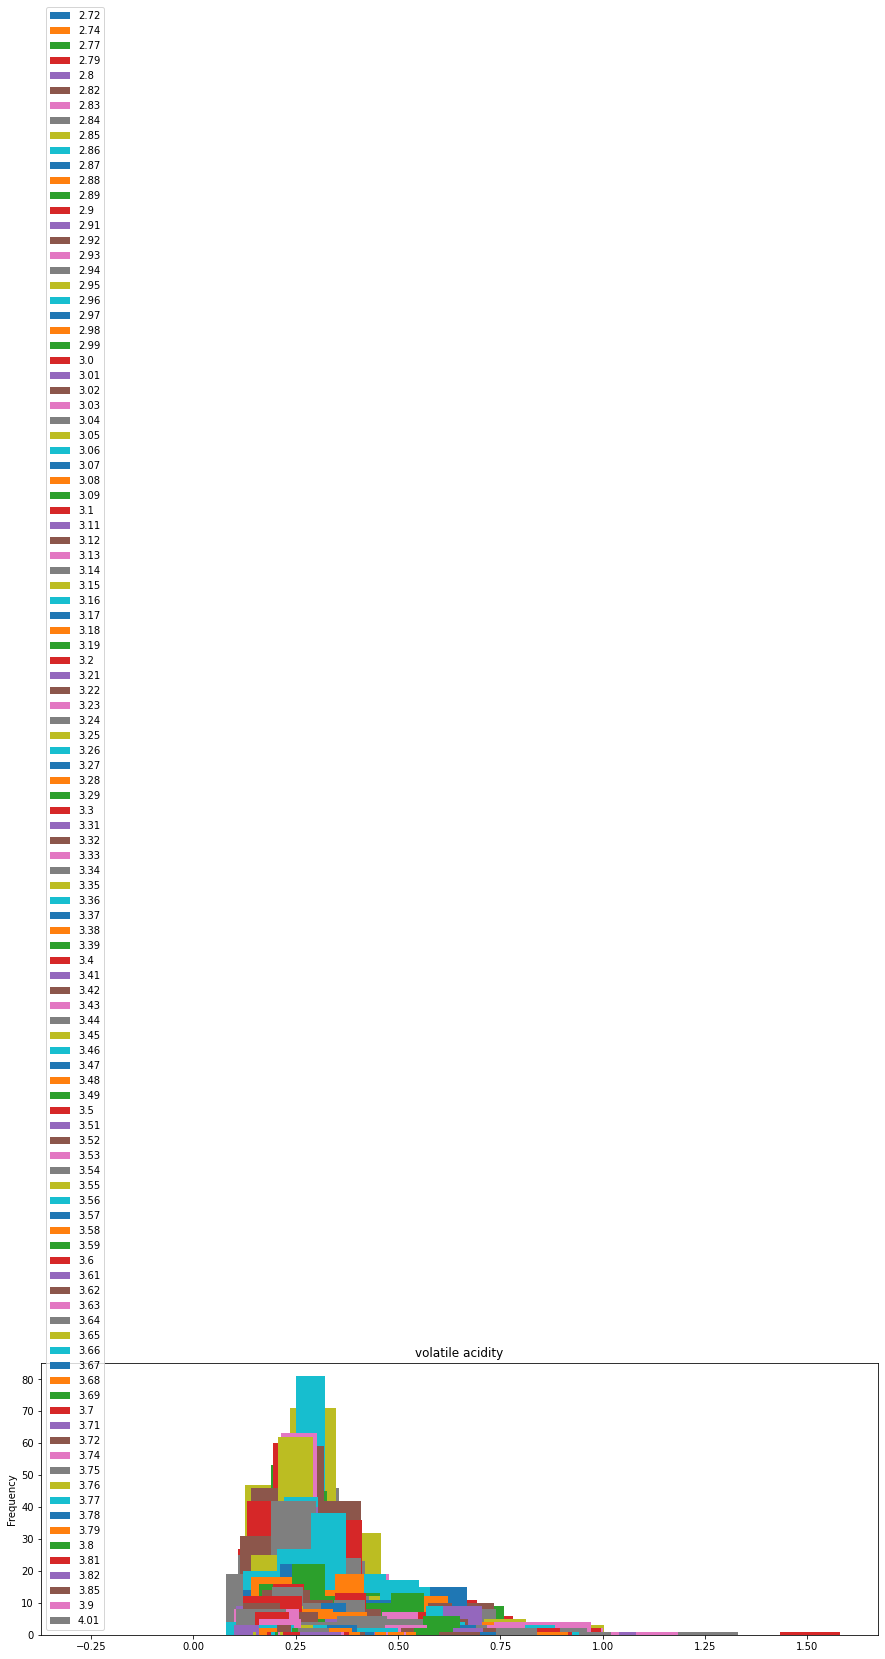

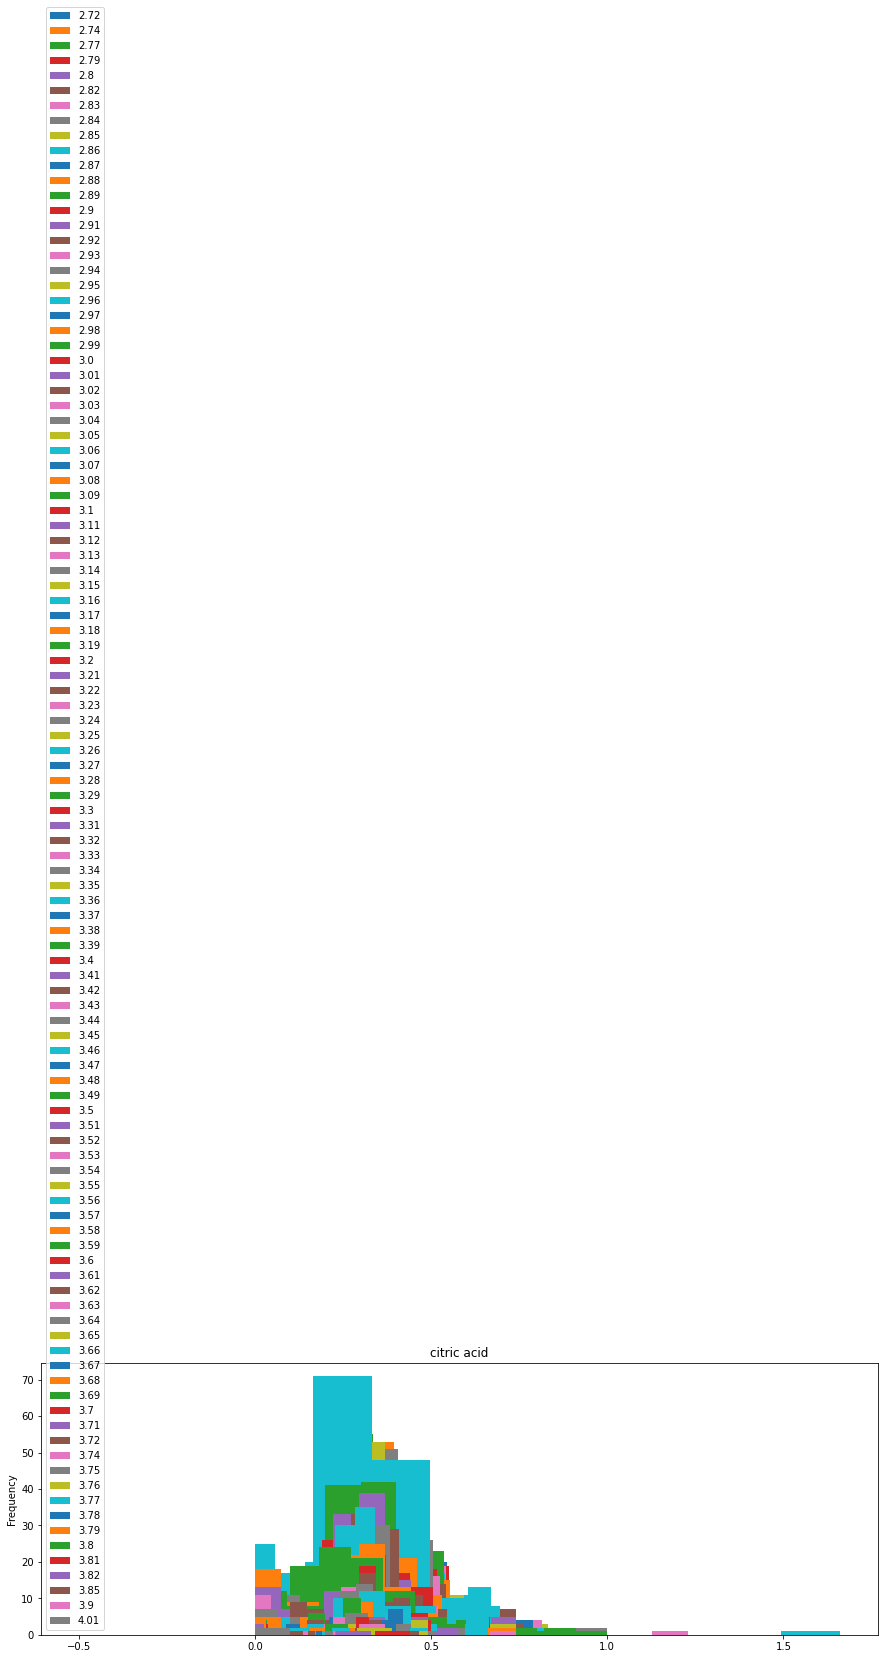

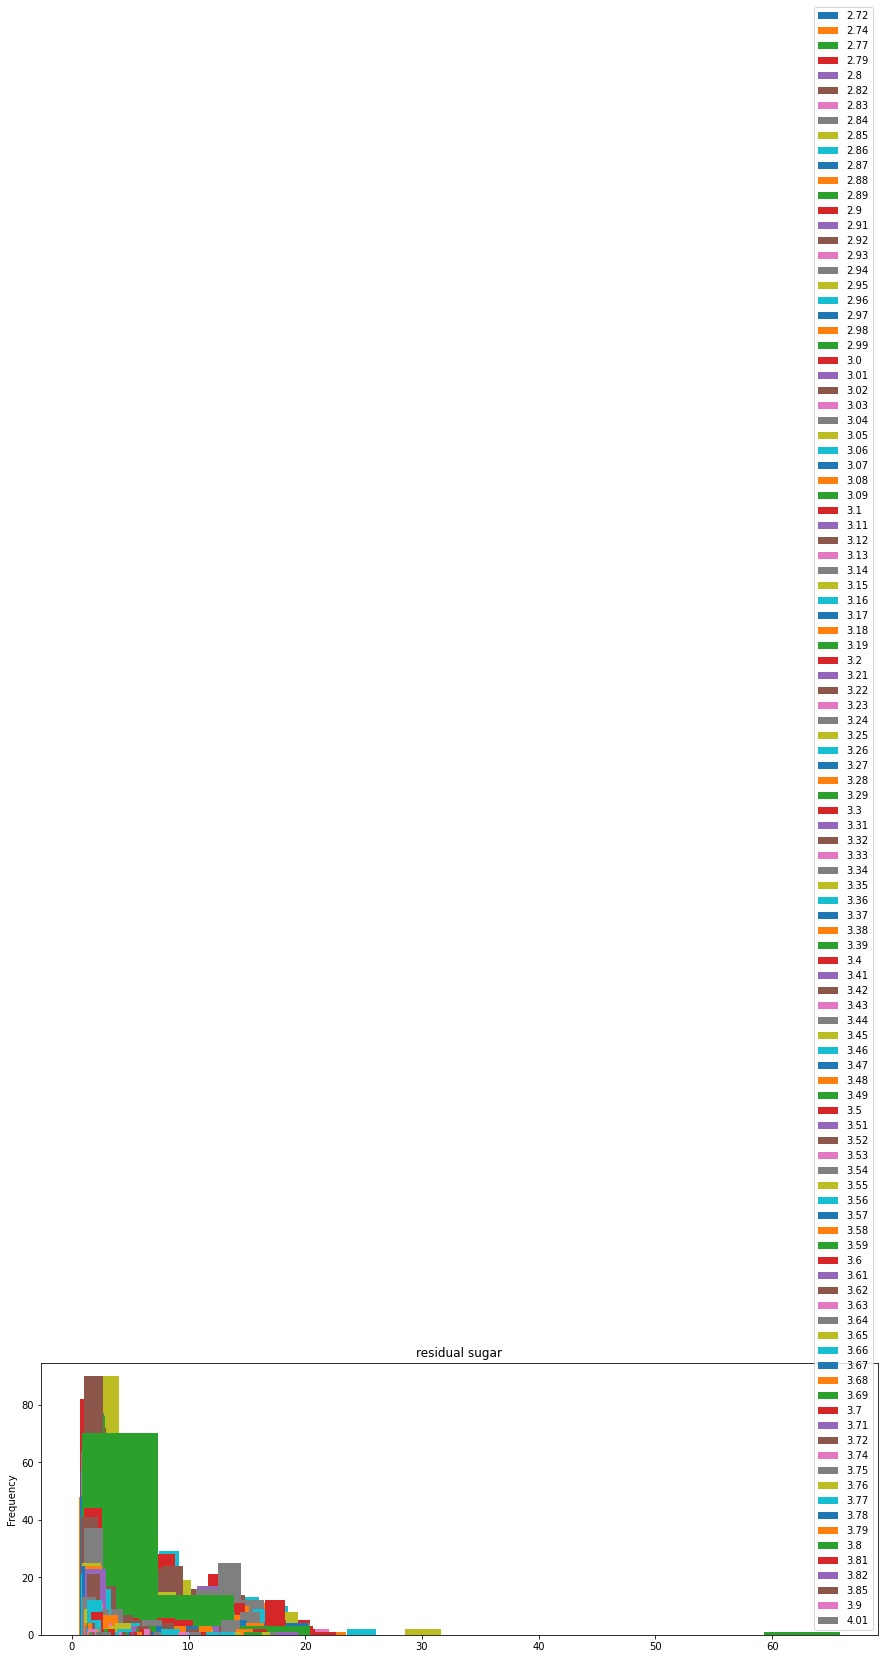

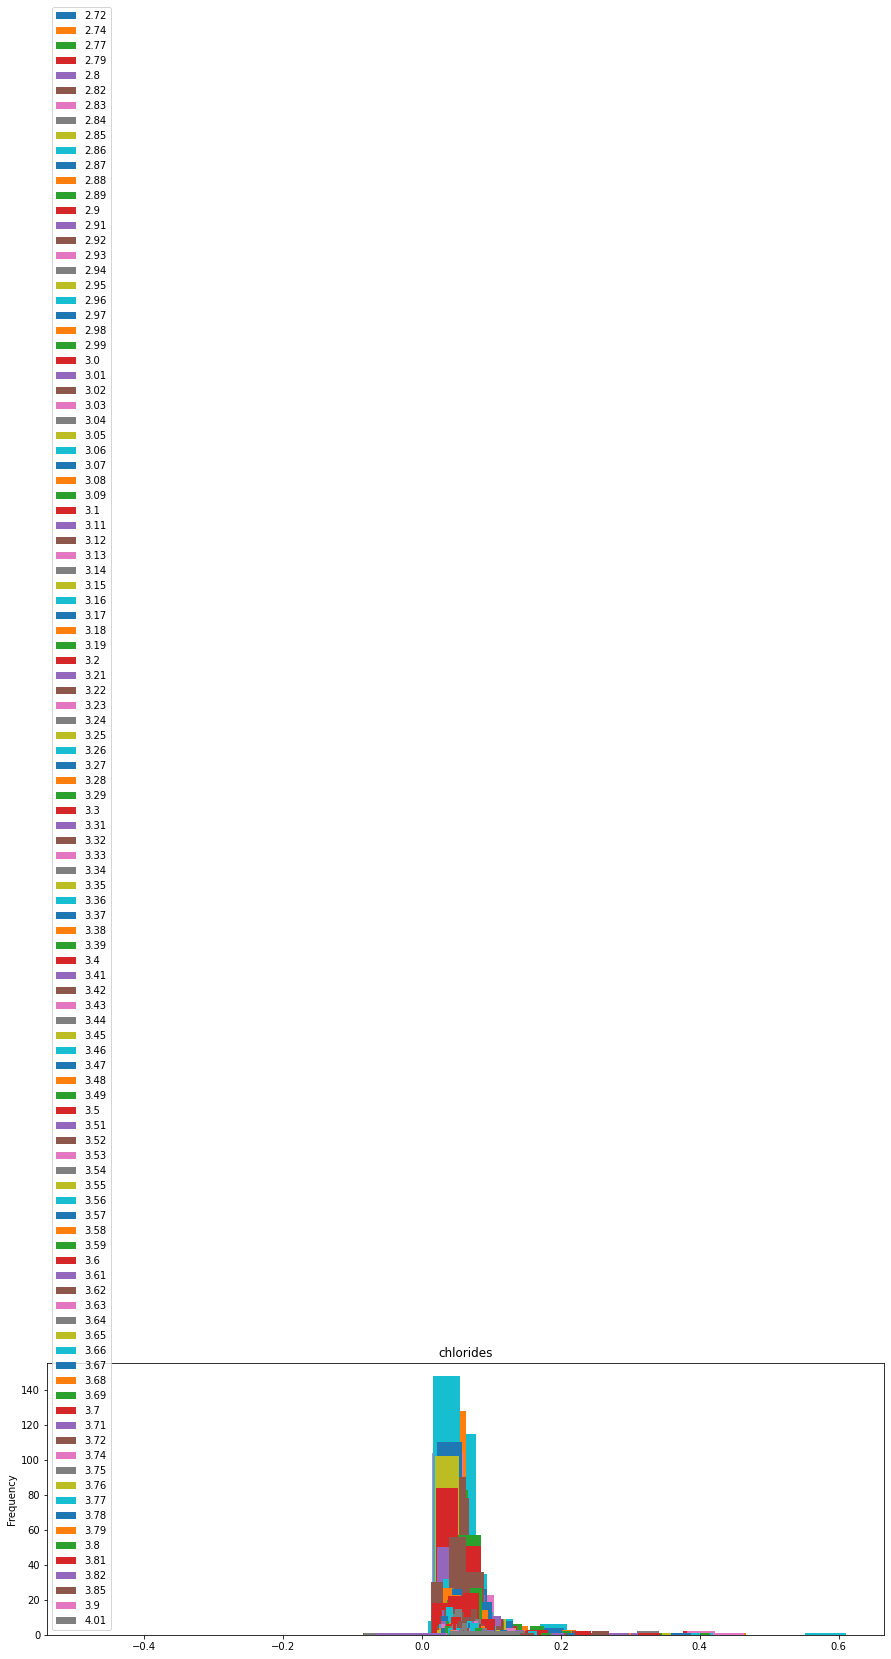

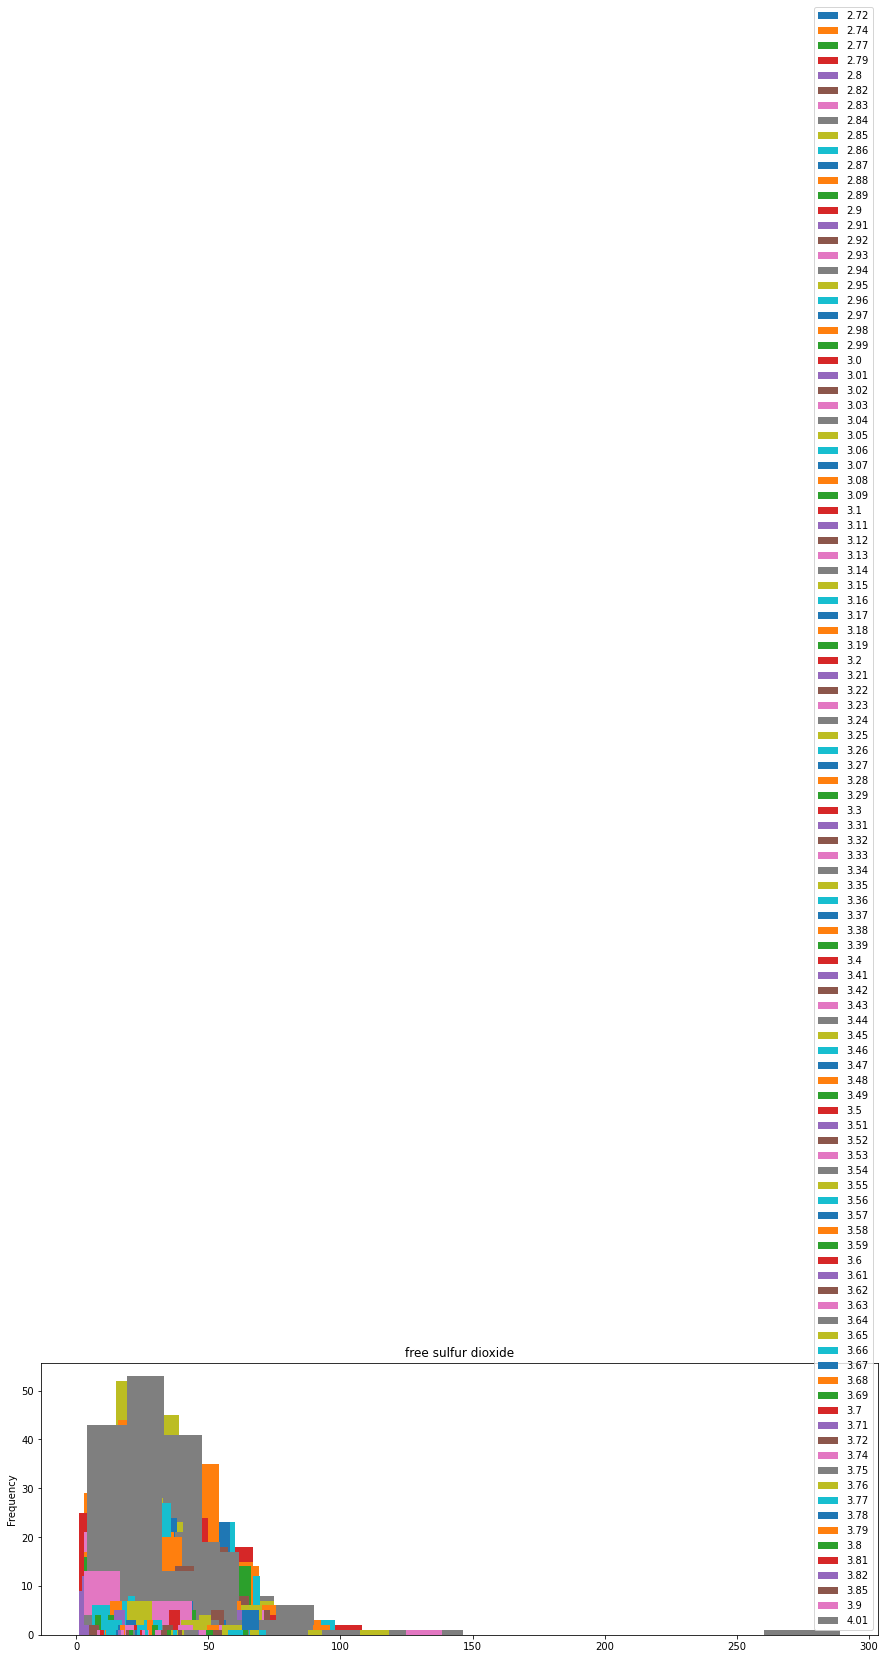

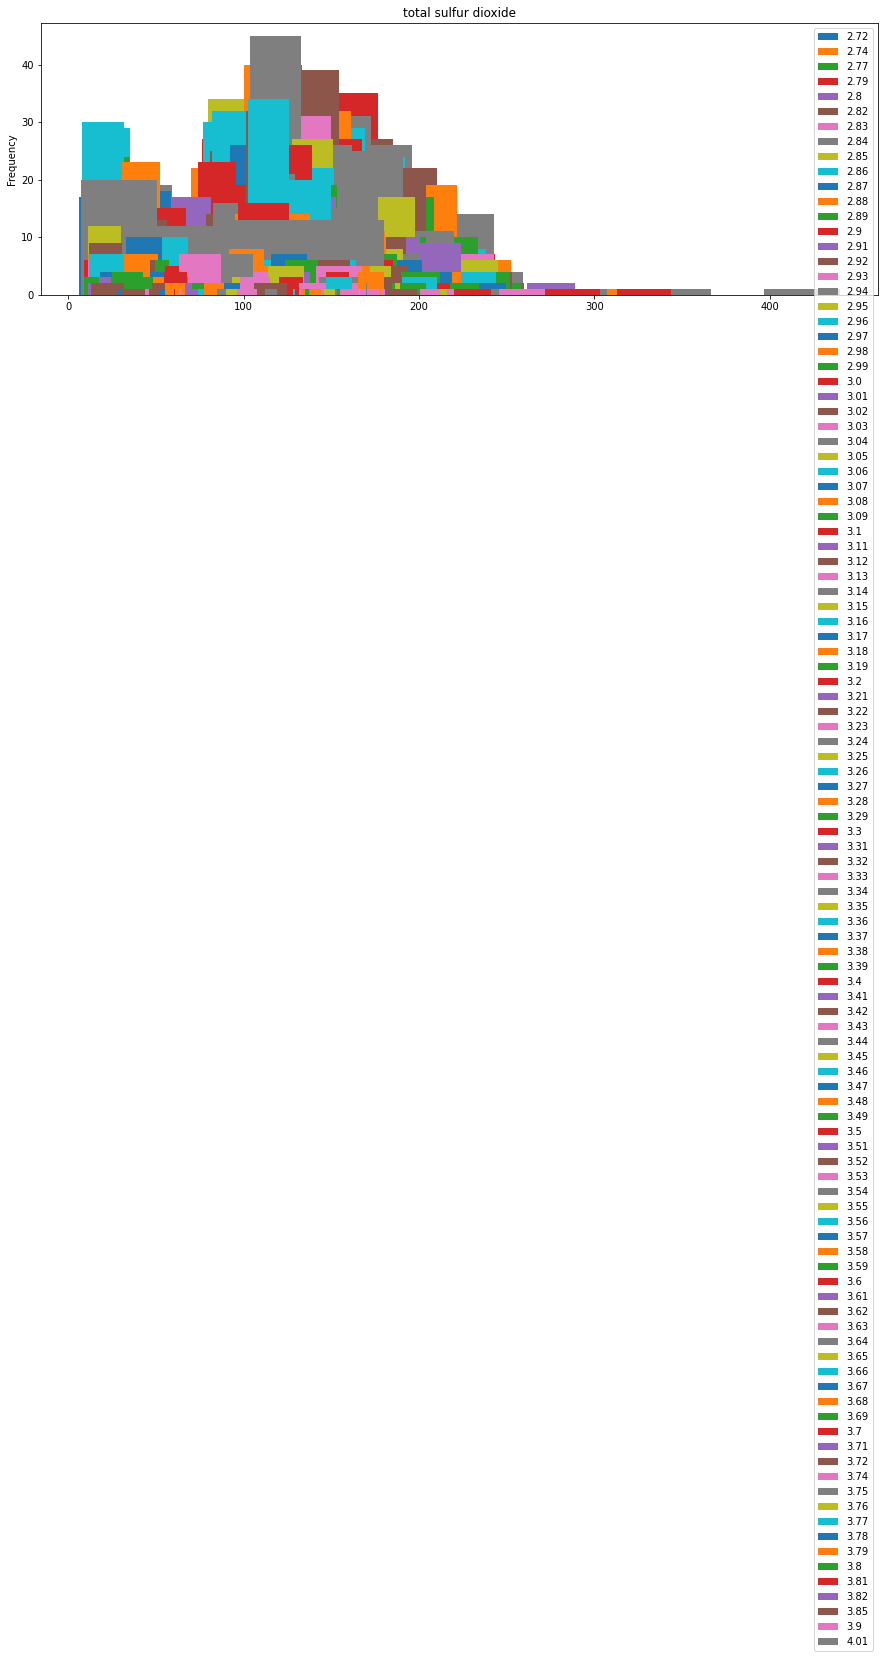

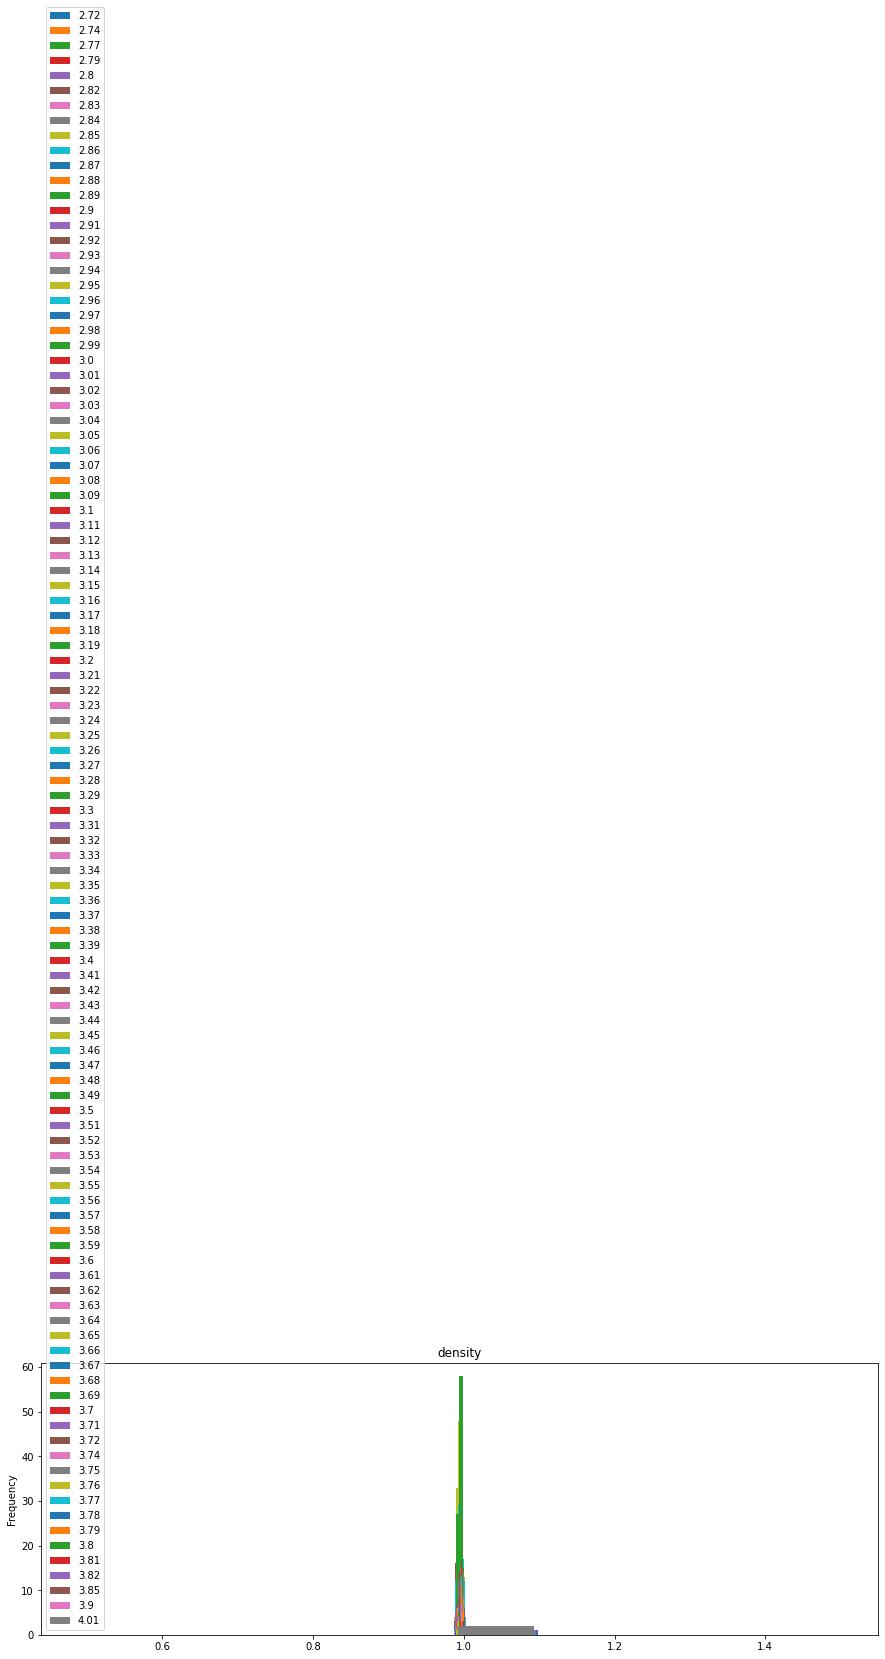

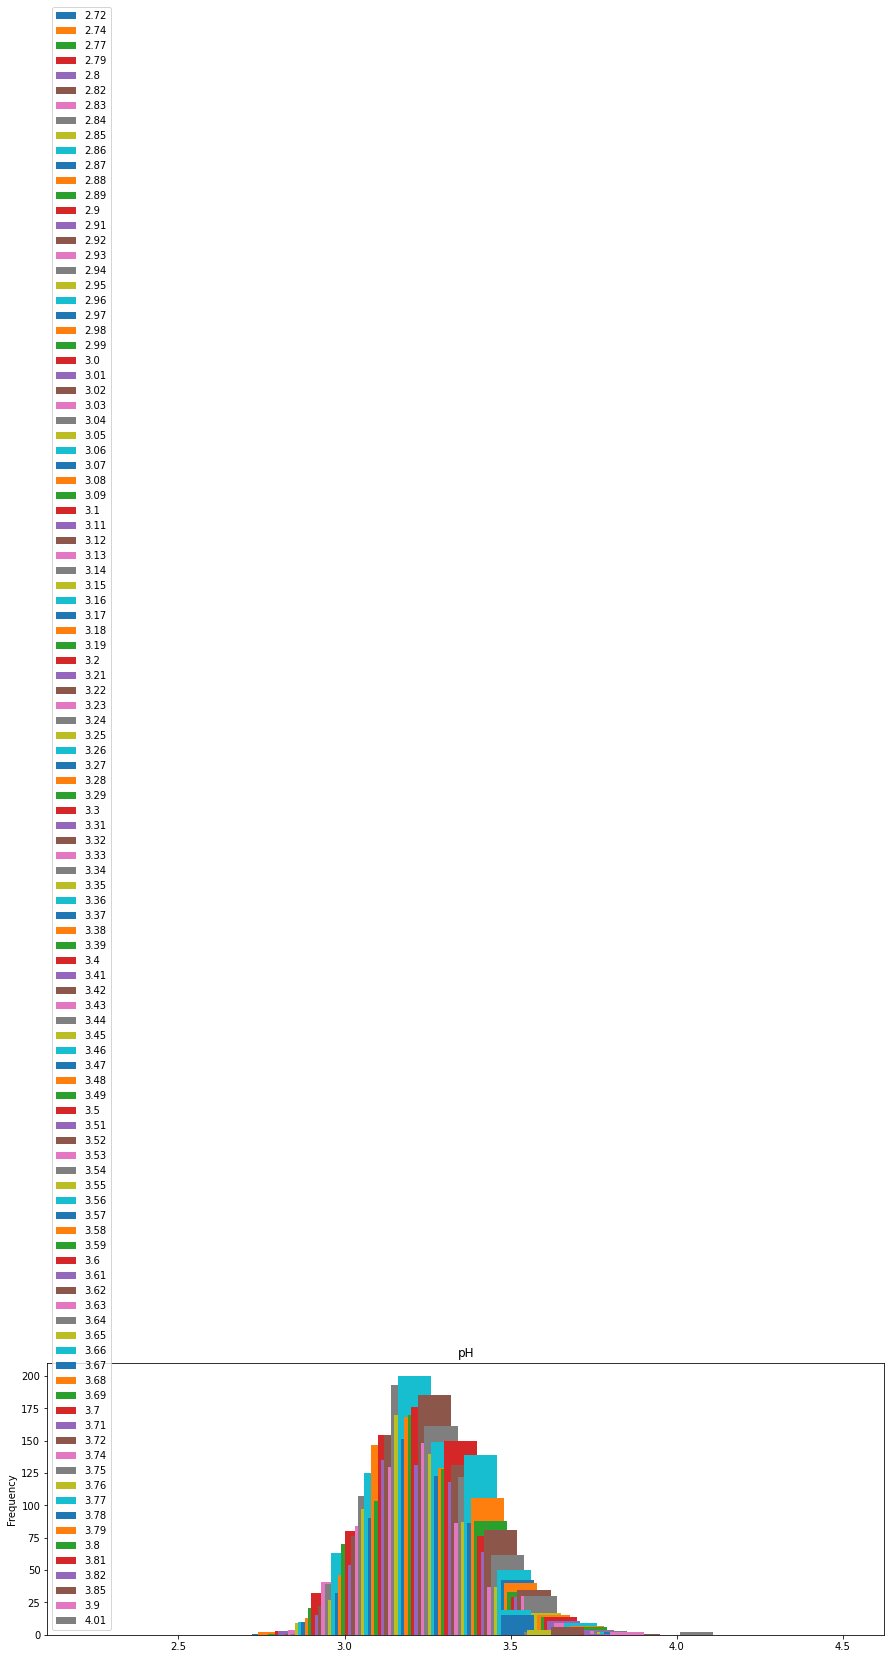

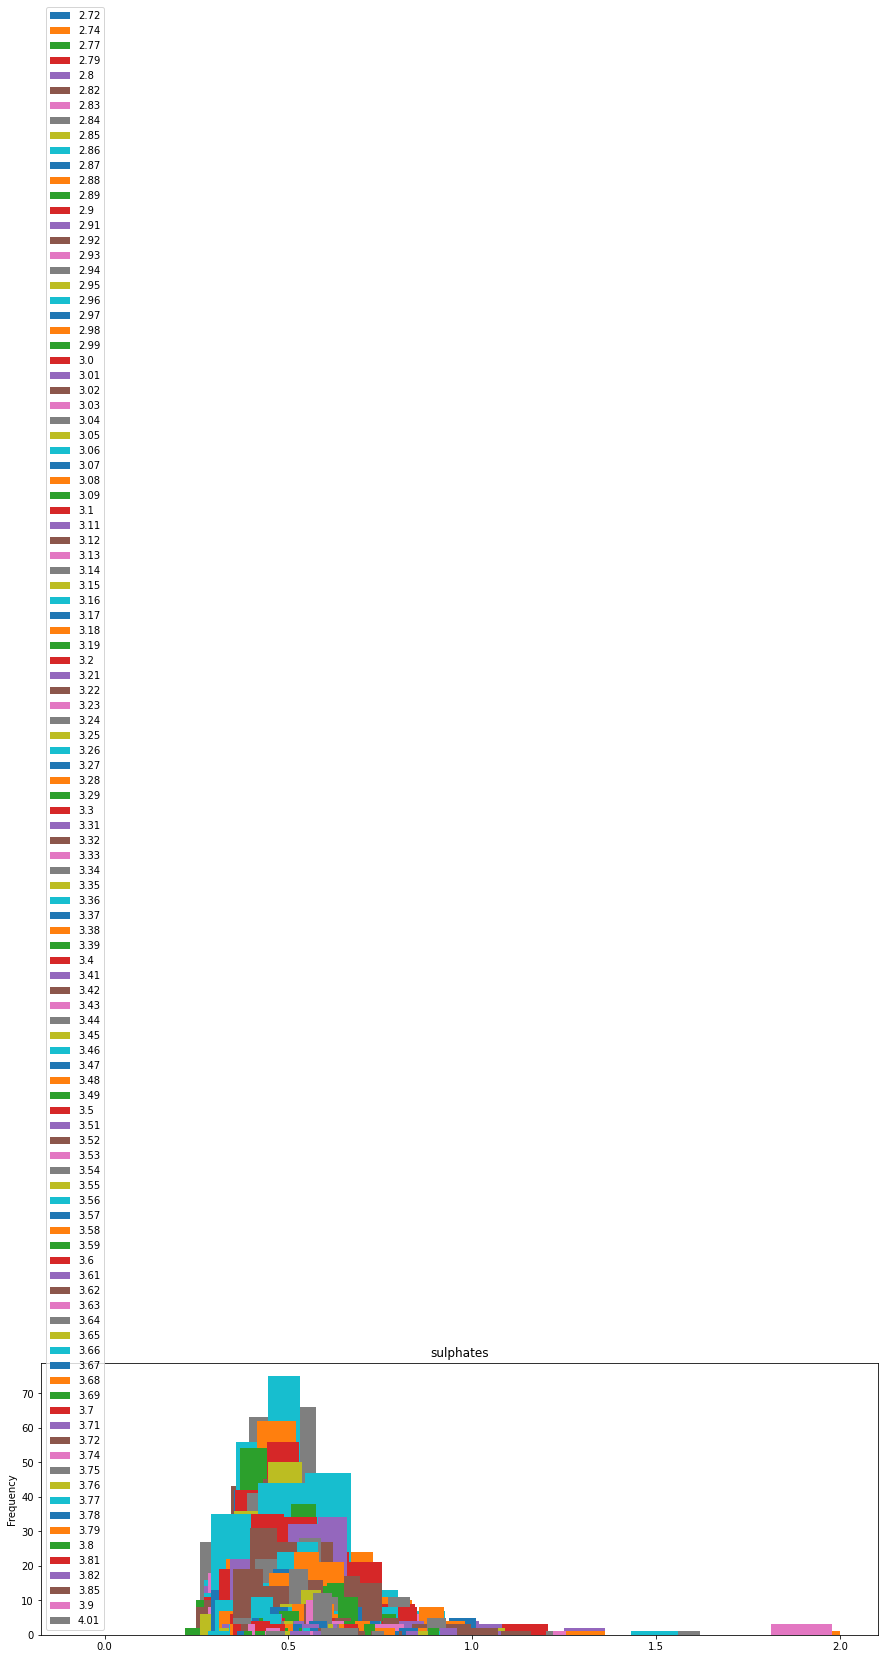

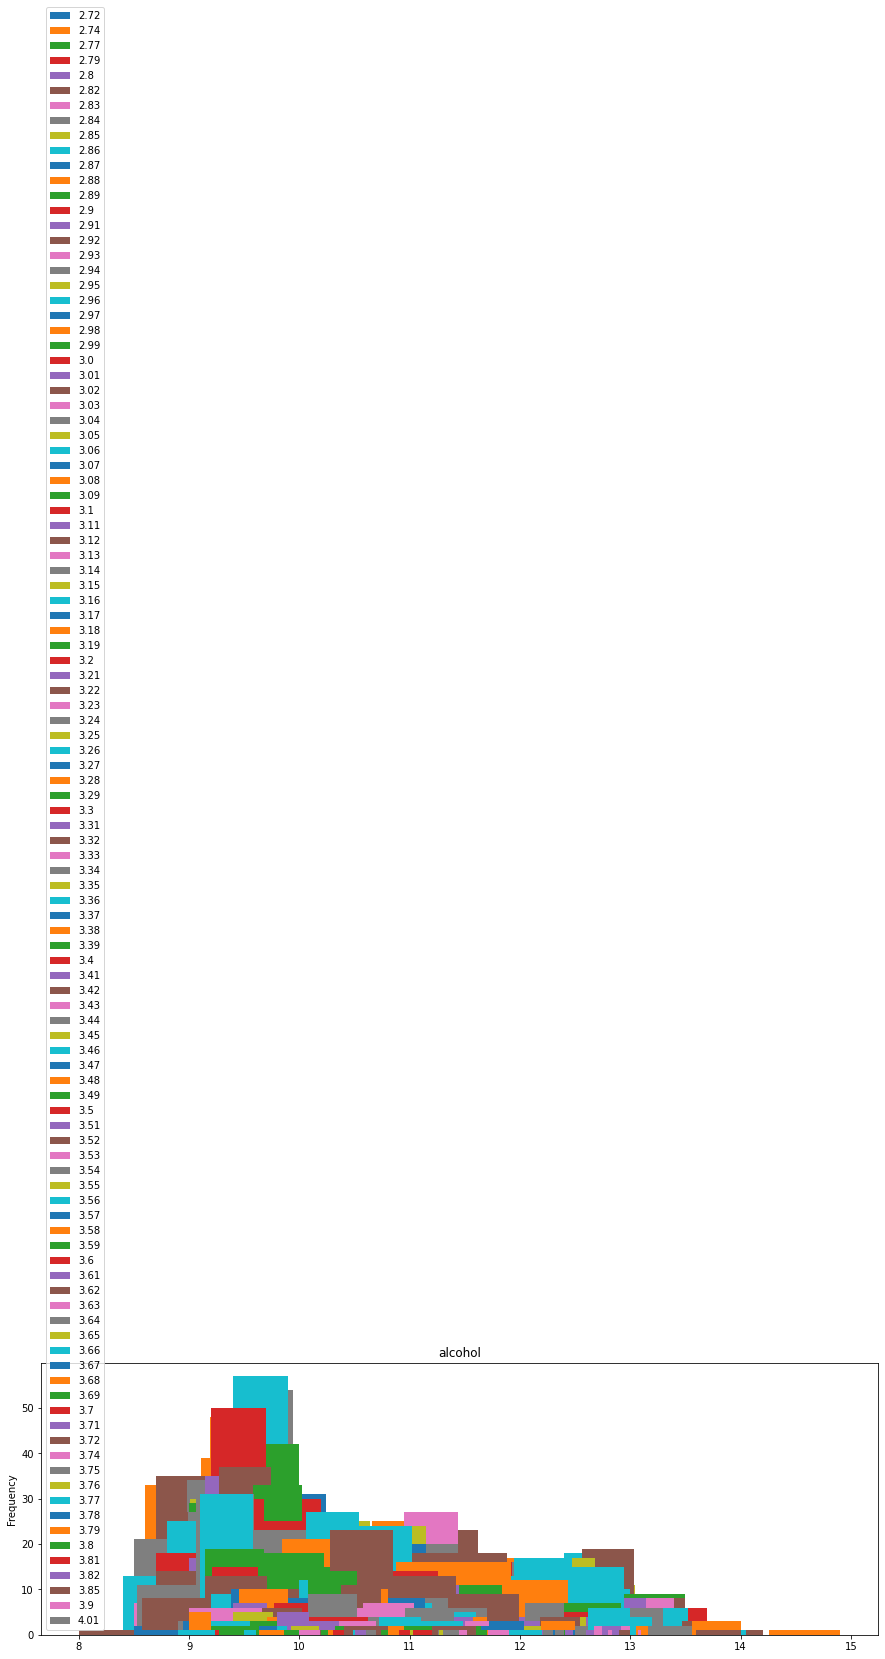

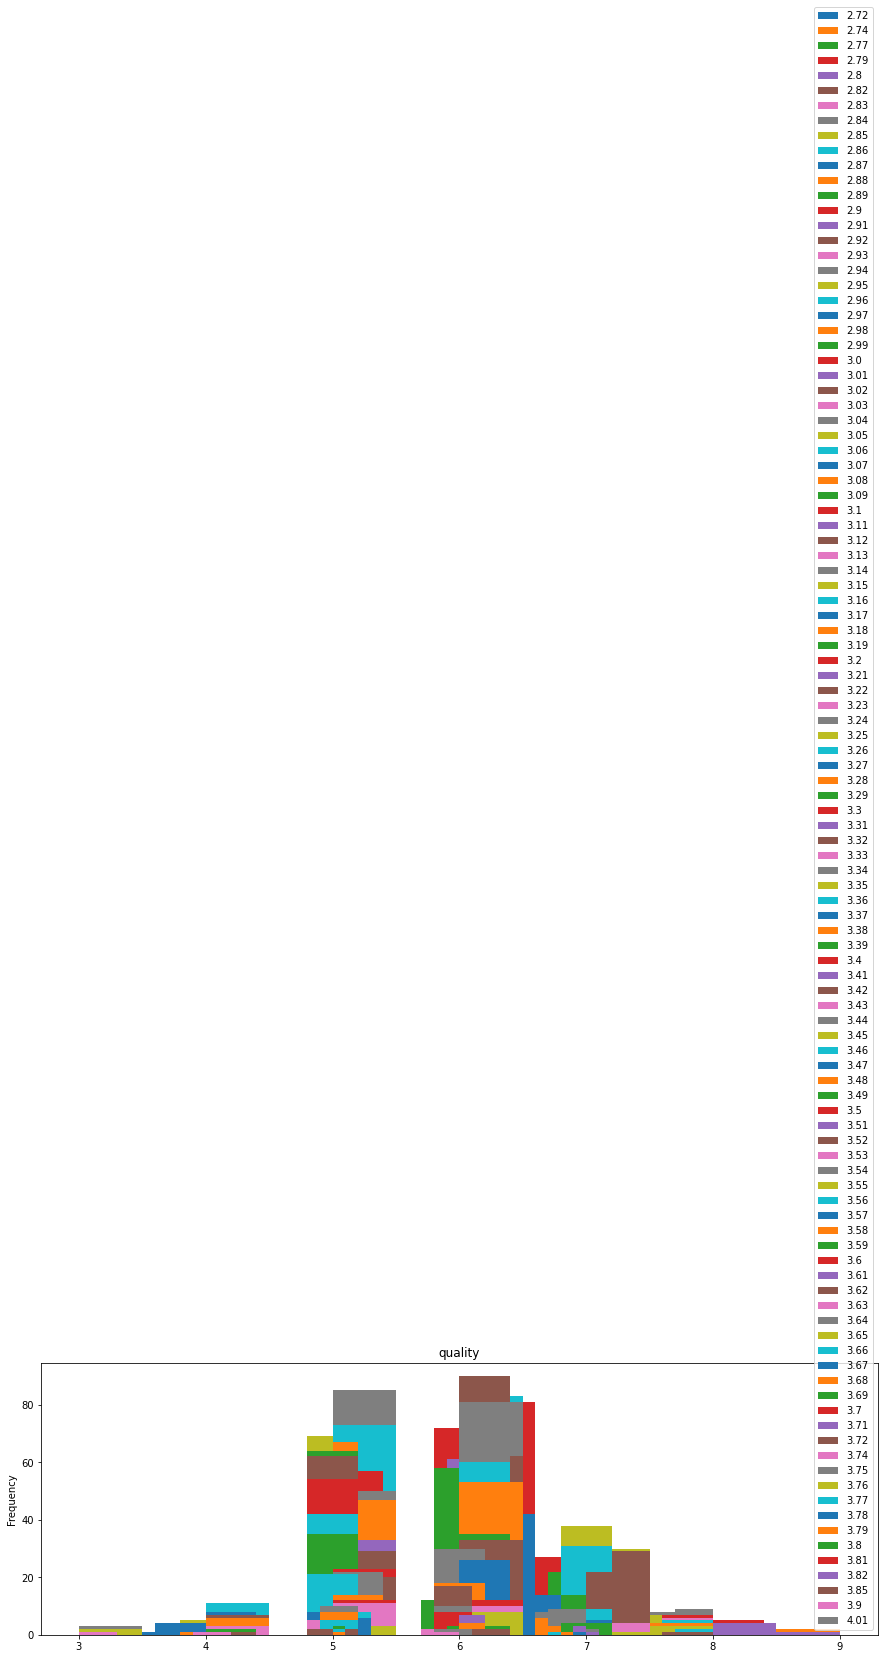

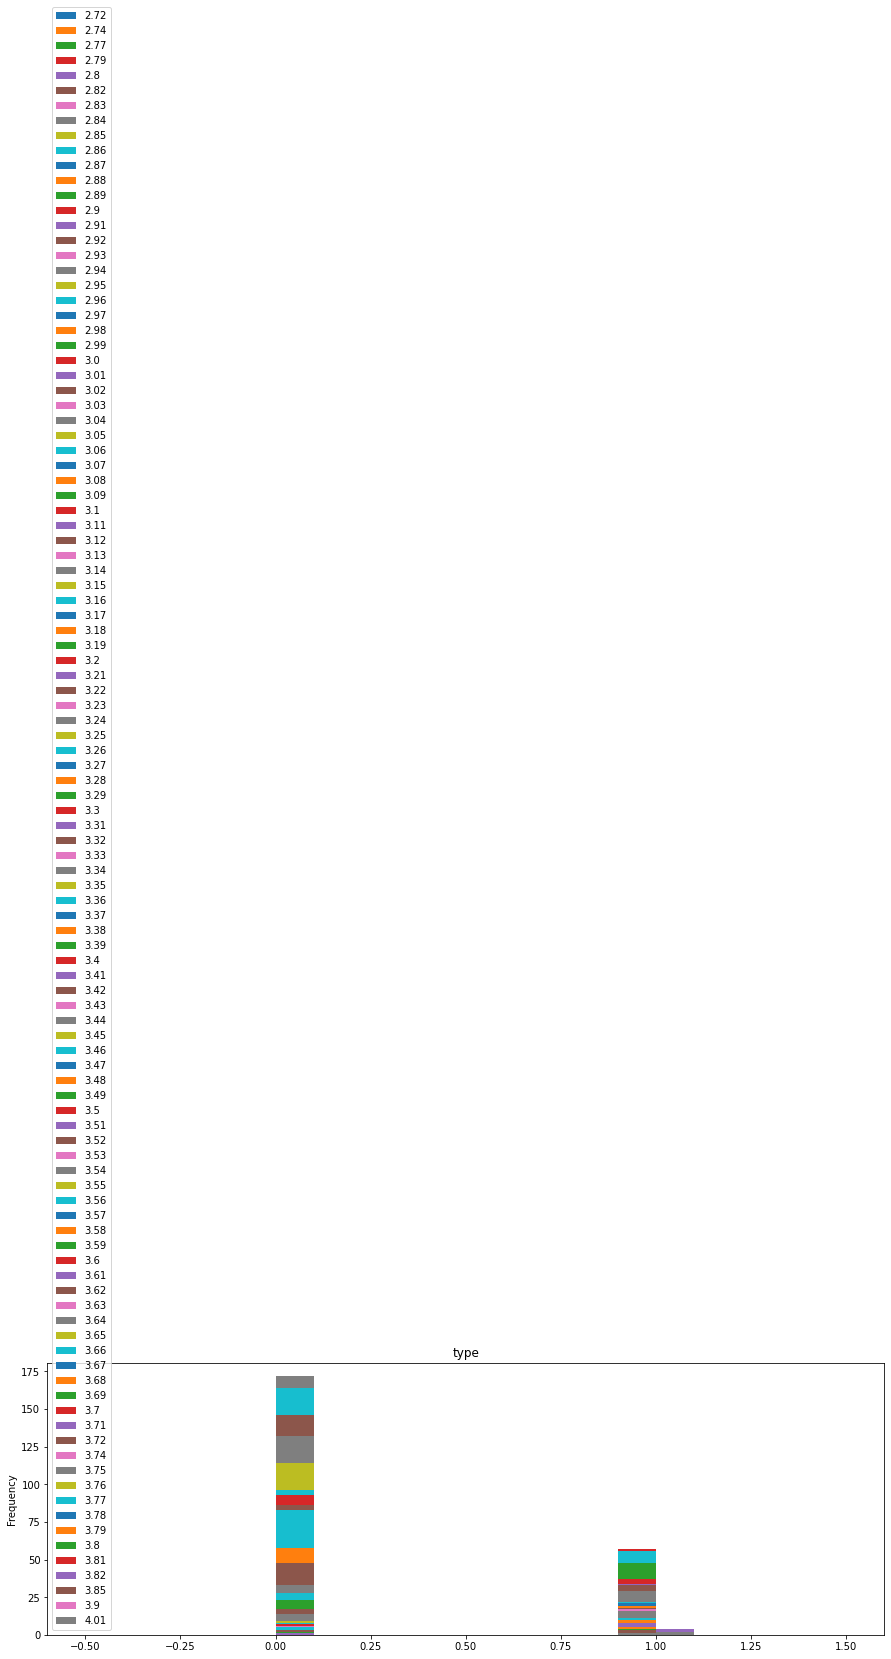

In [5]:
# Histogramas para grupo pH

# Referência: https://matplotlib.org/gallery/index.html

for (column, _ ) in df_wine.drop(['low_high'], axis = 1).items():
    plt.figure()
    df_wine.groupby('pH')[column].plot.hist(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

**Essa análise já não parece fazer sentido já que a variável a ser agrupada tem característica de ser contínua.
Vamos discretizar a variável pH de acordo com o seu range dinâmico**

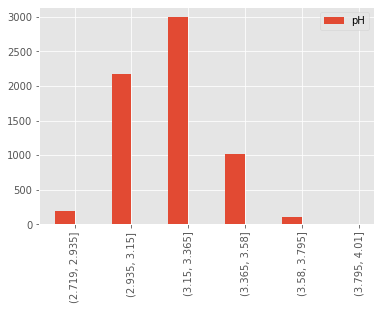

In [28]:
# Histogramas para grupo pH discretizado em 6 categorias

# Referência: https://matplotlib.org/gallery/index.html'''
#            https://benalexkeen.com/bucketing-continuous-variables-in-pandas/'''

# Gerando 6 bins ou buckets para os valores de pH'''
df_wine['pH'] = pd.cut(df_wine['pH'], 6)

plt.style.use('ggplot')

a = df_wine.groupby('pH').size()

categories = df_wine['pH'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, a, width, label='pH')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()


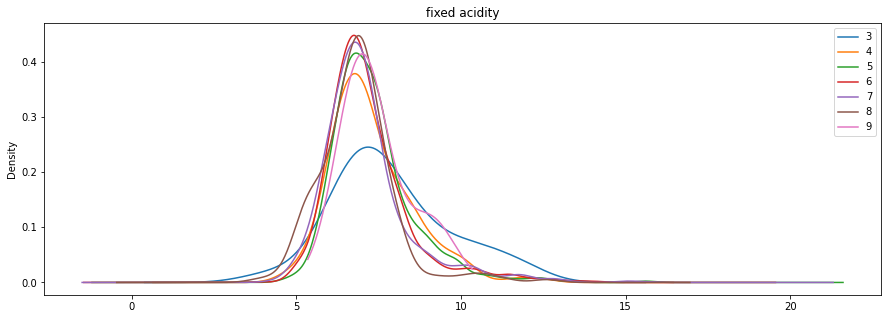

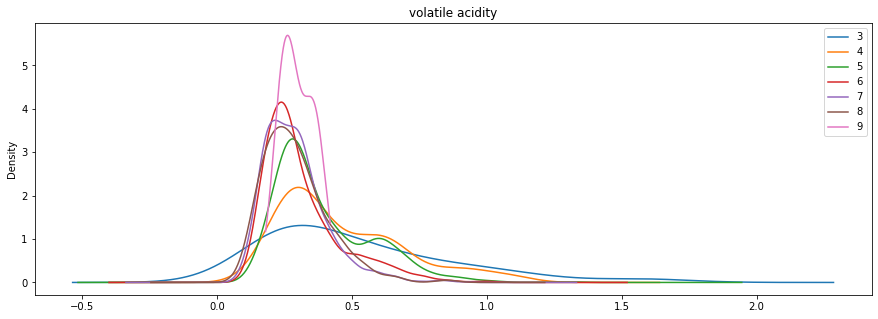

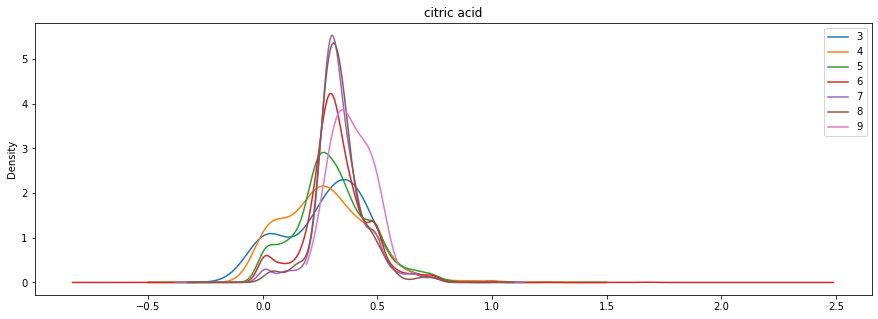

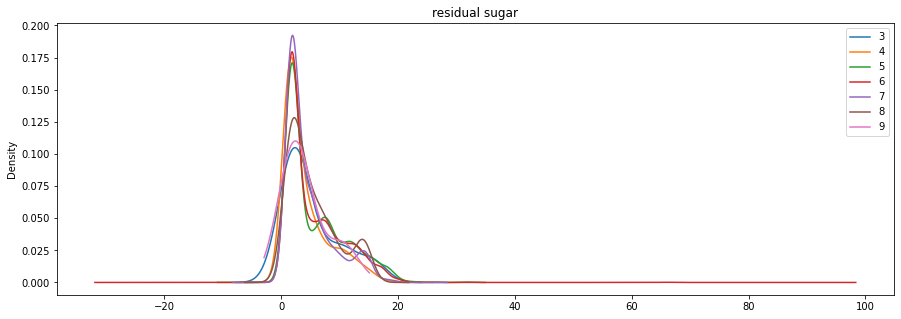

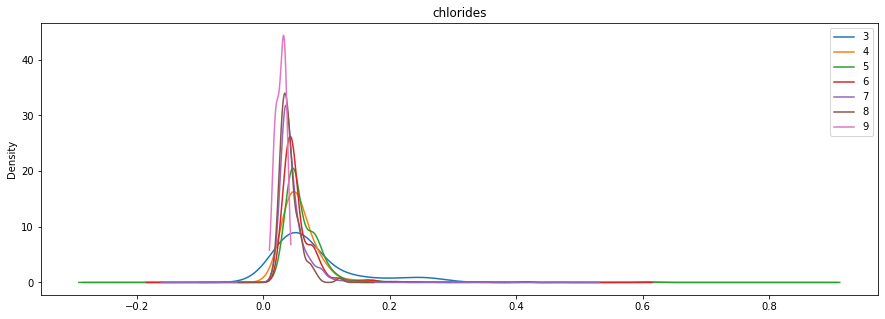

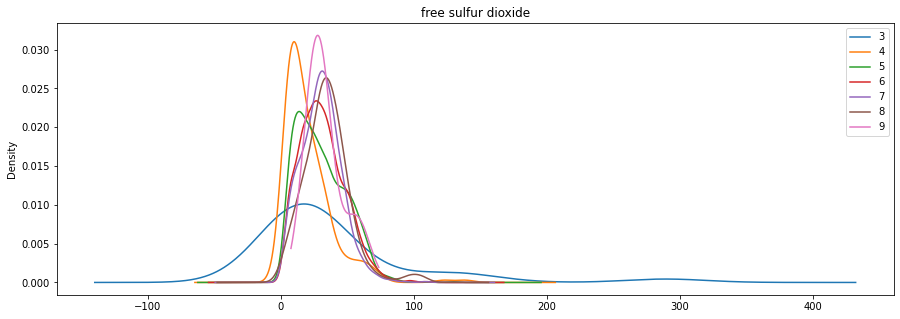

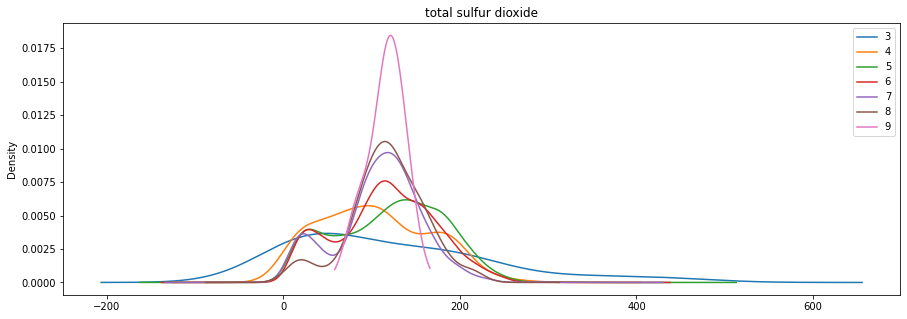

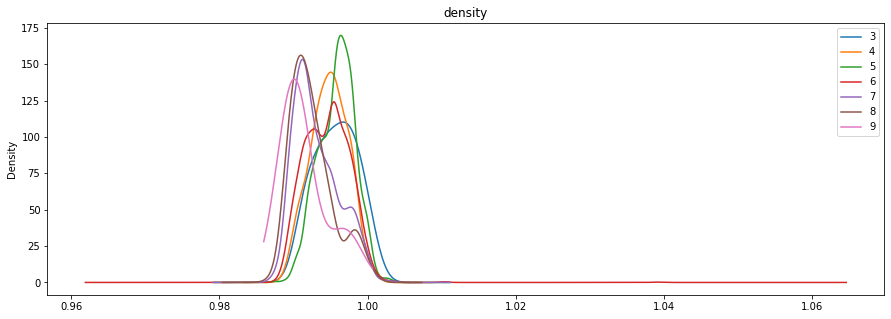

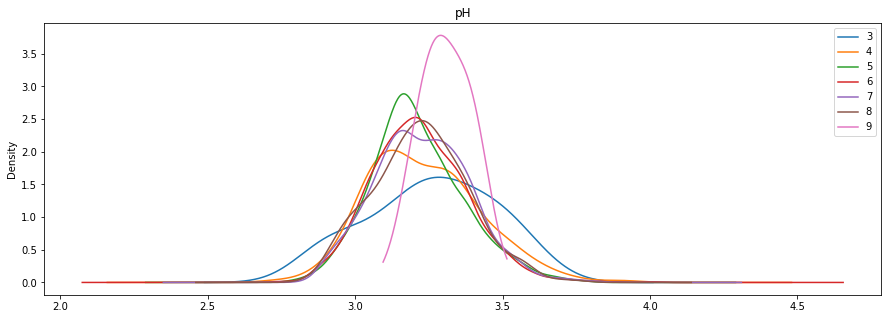

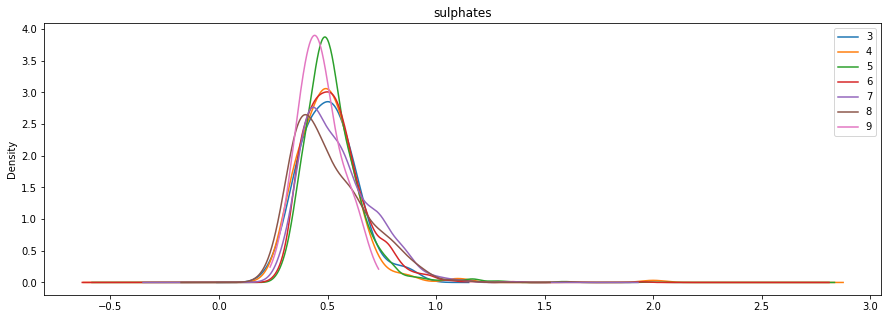

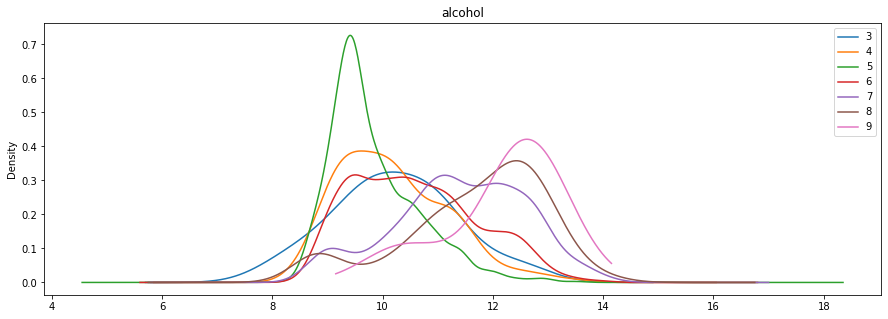

In [6]:
# KDE para grupo Qualidade

# Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

# Observação: A inclusão da coluna quality e type apresenta erro na geração do KDE quando confrontada consigo mesmas'''
  
for (column, _ ) in df_wine.drop(['low_high','quality', 'type'], axis = 1).items():
    plt.figure()
    df_wine.groupby('quality')[column].plot.kde(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)